In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Para no abrir otra ventana adicional

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import category_encoders as ce

import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("weatherAUS.csv")

In [5]:
categorical = [var for var in df.columns if df[var].dtype == 'O']

In [6]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [7]:
cate1 = [var for var in categorical if df[var].isnull().sum() != 0]

In [8]:
#index = titanic.embarked[titanic.embarked.isna()].index
for var in categorical:
    print(df[var].value_counts() / float((len(df))))

Date
2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: count, Length: 3436, dtype: float64
Location
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera             0.02

In [9]:
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [11]:
df.drop('Date', axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [12]:
categorical = [var for var in df.columns if df[var].dtype == 'O']
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [13]:
df[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [14]:
def separate(var):
    return pd.get_dummies(df[var], drop_first=True, dtype=int, dummy_na=True)

In [15]:
for var in categorical:
    print(separate(var).sum(axis=0))

Albany              3040
Albury              3040
AliceSprings        3040
BadgerysCreek       3009
Ballarat            3040
Bendigo             3040
Brisbane            3193
Cairns              3040
Canberra            3436
Cobar               3009
CoffsHarbour        3009
Dartmoor            3009
Darwin              3193
GoldCoast           3040
Hobart              3193
Katherine           1578
Launceston          3040
Melbourne           3193
MelbourneAirport    3009
Mildura             3009
Moree               3009
MountGambier        3040
MountGinini         3040
Newcastle           3039
Nhil                1578
NorahHead           3004
NorfolkIsland       3009
Nuriootpa           3009
PearceRAAF          3009
Penrith             3039
Perth               3193
PerthAirport        3009
Portland            3009
Richmond            3009
Sale                3009
SalmonGums          3001
Sydney              3344
SydneyAirport       3009
Townsville          3040
Tuggeranong         3039


In [16]:
#Explorar variables numericas
numerical = [var for var in df.columns if df[var].dtypes != 'O']
print(numerical)
print(f'Hay {len(numerical)} variables')

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']
Hay 19 variables


In [17]:
df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

In [18]:
print(round(df[numerical].describe(), 2))

         MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.00  144199.00  142199.00     82670.00  75625.00      135197.00   
mean       12.19      23.22       2.36         5.47      7.61          40.04   
std         6.40       7.12       8.48         4.19      3.79          13.61   
min        -8.50      -4.80       0.00         0.00      0.00           6.00   
25%         7.60      17.90       0.00         2.60      4.80          31.00   
50%        12.00      22.60       0.00         4.80      8.40          39.00   
75%        16.90      28.20       0.80         7.40     10.60          48.00   
max        33.90      48.10     371.00       145.00     14.50         135.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count     143693.00     142398.00    142806.00    140953.00    130395.00   
mean          14.04         18.66        68.88        51.54      1017.65   
std            8.92          8.81        19.03     

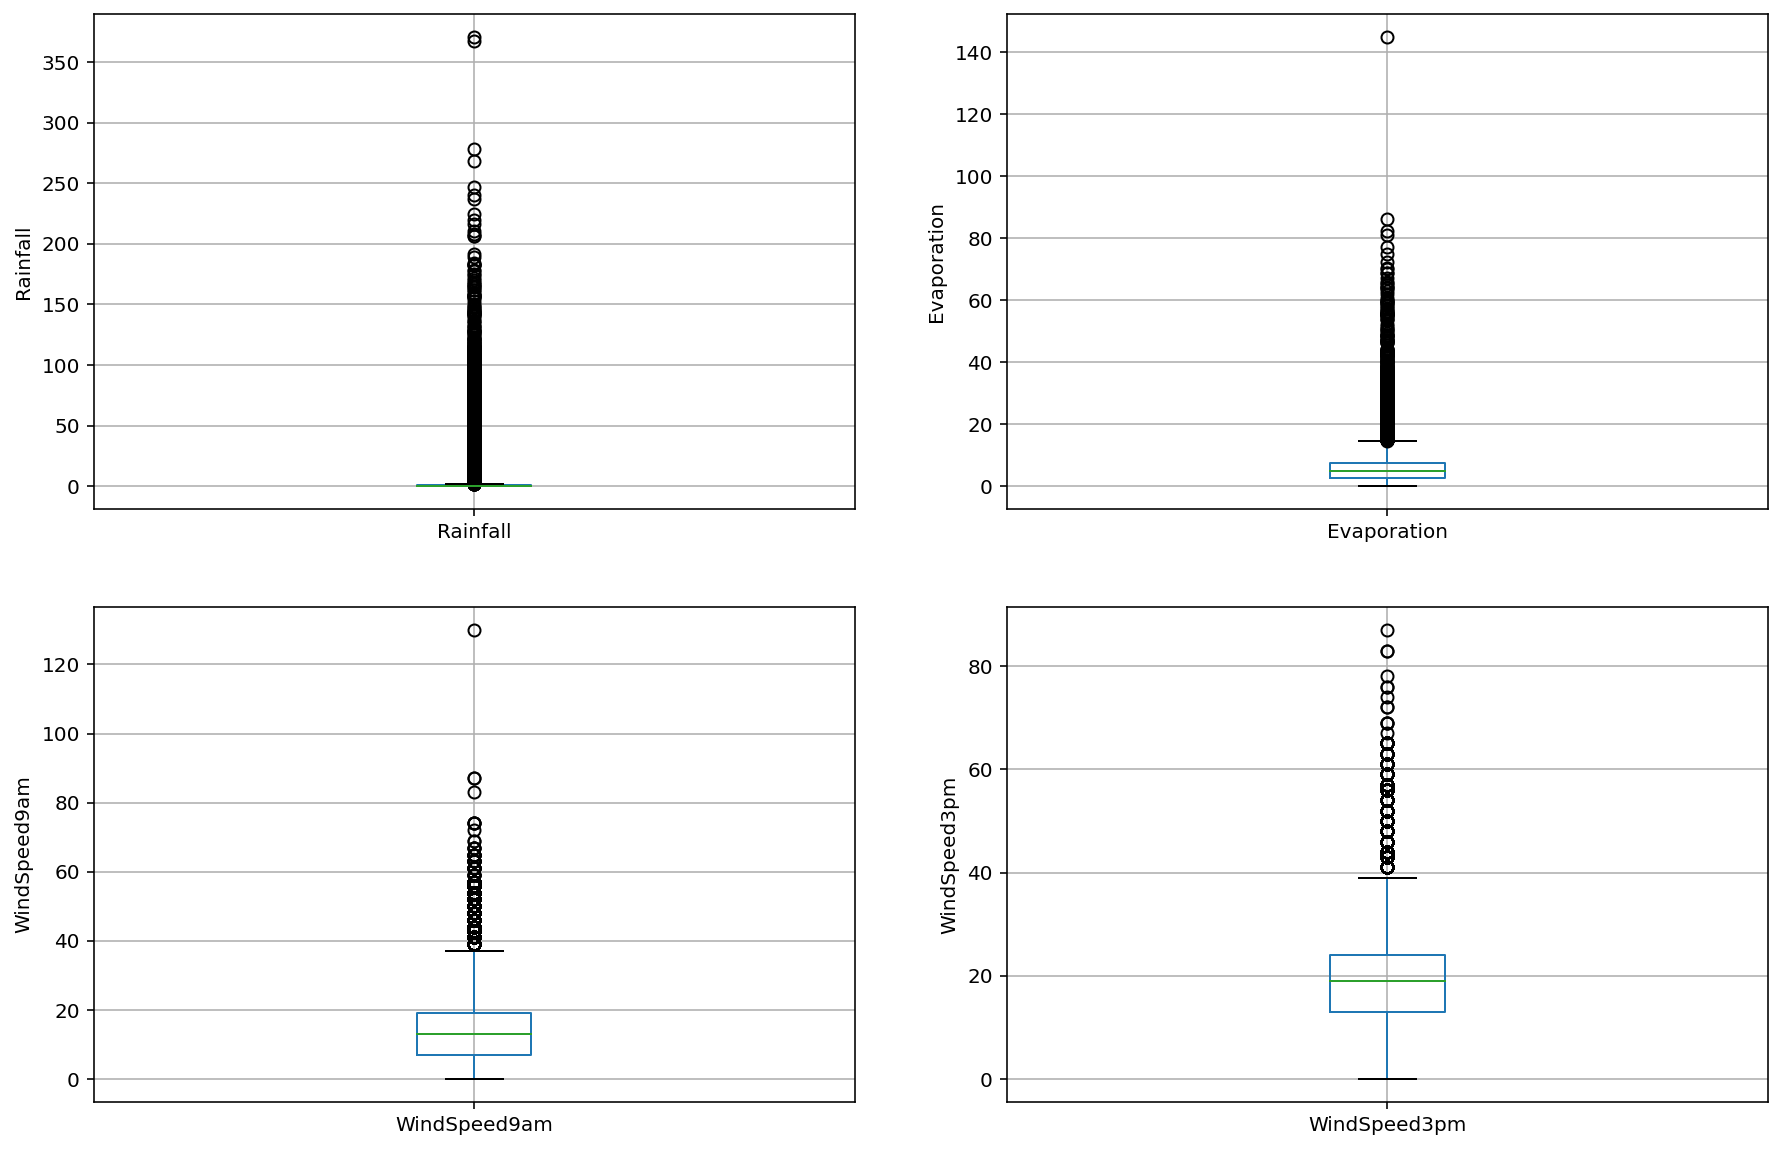

In [19]:
#Rainfall, Evaporation, WindSpeed9am y WindSpeed3pm son las columnas que contienen outliers.
outl = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']

plt.figure(figsize=(15, 10))
n = 0
for i in outl:
    n += 1
    plt.subplot(2, 2, n)
    fig = df.boxplot(column=outl[n - 1])
    fig.set_title('')
    fig.set_ylabel(outl[n - 1])

In [20]:
#g = sns.boxplot(data = df, x = 'Rainfall')

#g.set_title('')
#g.set_xlabel('Rainfall')

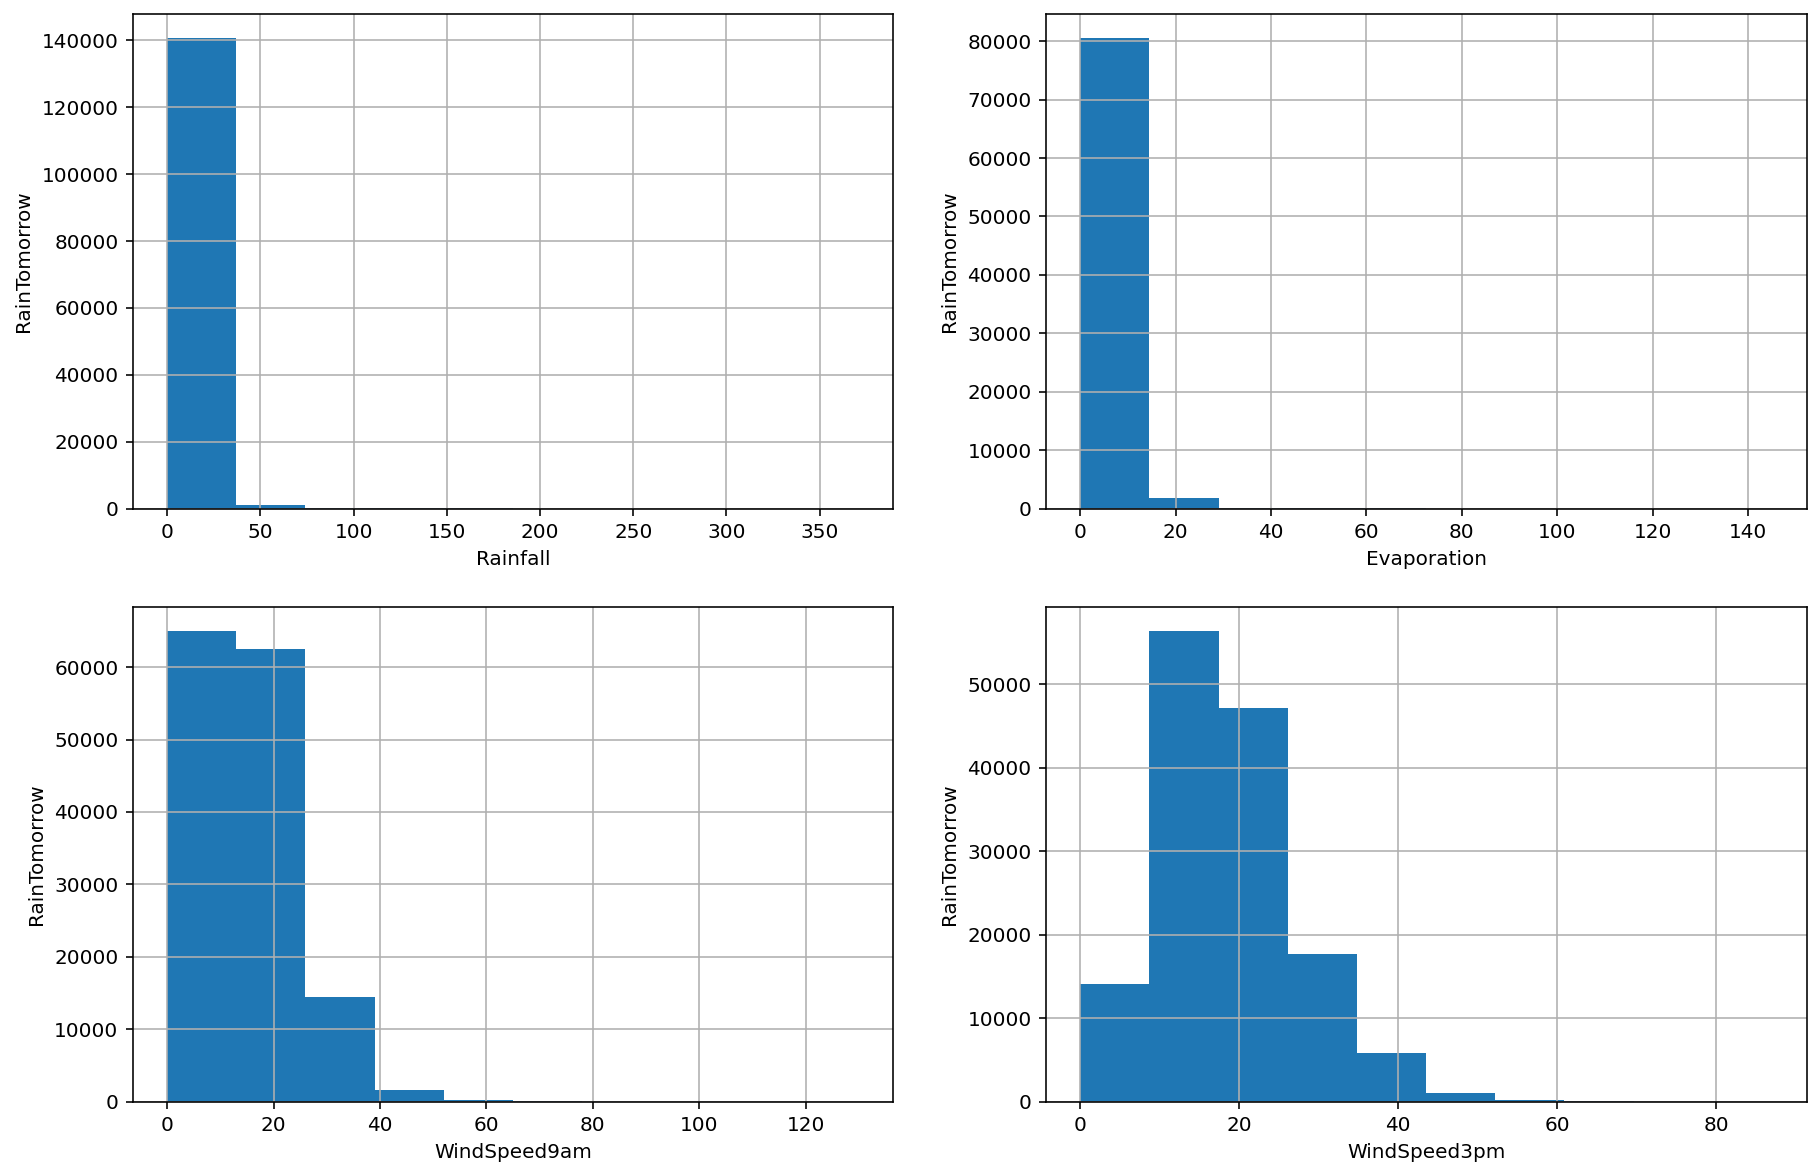

In [21]:
plt.figure(figsize=(15, 10))
m = 0
for i in outl:
    m += 1
    plt.subplot(2, 2, m)
    fig = df[outl[m - 1]].hist(bins=10)
    fig.set_xlabel(outl[m - 1])
    fig.set_ylabel('RainTomorrow')

#interquantile range

In [22]:
for i in outl:
    IQR = df[i].quantile(0.75) - df[i].quantile(0.25)
    Lower_fence = df[i].quantile(0.25) - (IQR * 3)
    Upper_fence = df[i].quantile(0.75) + (IQR * 3)
    #print('Rainfall outliers son valores < {lowerboundary} or > {upperboundary}'. format(lowerboundary = Lower_fence, upperboundary = Upper_fence))
    print(f'{i} outliers son valores < {Lower_fence} or > {Upper_fence}')

Rainfall outliers son valores < -2.4000000000000004 or > 3.2
Evaporation outliers son valores < -11.800000000000002 or > 21.800000000000004
WindSpeed9am outliers son valores < -29.0 or > 55.0
WindSpeed3pm outliers son valores < -20.0 or > 57.0


In [23]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, X_test.shape

((116368, 24), (29092, 24))

In [25]:
X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int32
Month              int32
Day                int32
dtype: object

In [26]:
categorical = [var for var in X_train.columns if X_train[var].dtype == 'O']
numerical = [var for var in X_train.columns if X_train[var].dtype != 'O']

In [27]:
#X_train[numerical1].isnull().sum()
X_train.isnull().mean()

Location         0.000000
MinTemp          0.010166
MaxTemp          0.008757
Rainfall         0.022489
Evaporation      0.432722
Sunshine         0.480364
WindGustDir      0.071068
WindGustSpeed    0.070621
WindDir9am       0.072597
WindDir3pm       0.028951
WindSpeed9am     0.012108
WindSpeed3pm     0.021105
Humidity9am      0.018450
Humidity3pm      0.030919
Pressure9am      0.103903
Pressure3pm      0.103671
Cloud9am         0.384951
Cloud3pm         0.408678
Temp9am          0.012160
Temp3pm          0.024620
RainToday        0.022489
Year             0.000000
Month            0.000000
Day              0.000000
dtype: float64

In [28]:
for col in numerical:
    if X_train[col].isnull().mean() > 0:
        print(col, round(X_train[col].isnull().mean(), 4))

MinTemp 0.0102
MaxTemp 0.0088
Rainfall 0.0225
Evaporation 0.4327
Sunshine 0.4804
WindGustSpeed 0.0706
WindSpeed9am 0.0121
WindSpeed3pm 0.0211
Humidity9am 0.0185
Humidity3pm 0.0309
Pressure9am 0.1039
Pressure3pm 0.1037
Cloud9am 0.385
Cloud3pm 0.4087
Temp9am 0.0122
Temp3pm 0.0246


In [29]:
#Median imputation method when there are outliers in the dataset.
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [30]:
for col in categorical:
    if X_train[col].isnull().mean() > 0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.07106764746322013
WindDir9am 0.07259727760208992
WindDir3pm 0.028951258077822083
RainToday 0.02248900041248453


In [31]:
#Completa los campos vacios con la moda de la columna, en caso hubiera mas de una moda, se selecciona la primera agregando [0]
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [32]:
def max_value(df3, variable, top):
    return np.where(df3[variable] > top, top, df3[variable])


for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [33]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
22926,NorfolkIsland,ESE,ESE,ESE,No
80735,Watsonia,NE,NNW,NNE,No
121764,Perth,SW,N,SW,Yes
139821,Darwin,ESE,ESE,E,No
1867,Albury,E,ESE,E,Yes


In [34]:
#Ejecutar en todo el bloque
encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [35]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
    pd.get_dummies(X_train.Location, dtype=int),
    pd.get_dummies(X_train.WindGustDir, dtype=int),
    pd.get_dummies(X_train.WindDir9am, dtype=int),
    pd.get_dummies(X_train.WindDir3pm, dtype=int)
],
                    axis=1)

In [36]:
X_test = pd.concat([
    X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
    pd.get_dummies(X_test.Location, dtype=int),
    pd.get_dummies(X_test.WindGustDir, dtype=int),
    pd.get_dummies(X_test.WindDir9am, dtype=int),
    pd.get_dummies(X_test.WindDir3pm, dtype=int)
],
                   axis=1)

In [37]:
#Featuring Scaling
cols = X_train.columns

In [38]:
#Convierte X_train y X_test en un tipo Numpy.ndarray.
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [39]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [40]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.512133,0.529359,0.209625,0.233640,0.550516,0.263427,0.255080,0.327850,0.689507,0.516058,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,0.157596,0.133940,0.369223,0.128450,0.190458,0.101767,0.160647,0.152642,0.188114,0.204400,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400990,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507426,0.517958,0.000000,0.215596,0.579310,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.626238,0.623819,0.187500,0.238532,0.593103,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
print(y_train.dtype)
print(y_test.dtype)

object
object


In [42]:
y_train.fillna(y_train.mode()[0], inplace=True)
y_test.fillna(y_train.mode()[0], inplace=True)

In [43]:
#Model Training
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [44]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [45]:
from sklearn.metrics import accuracy_score

#print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test),4)}')

Model accuracy score: 0.8484


In [46]:
#Probabilidad de que no llueva mañana
logreg.predict_proba(X_test)[:, 0]

array([0.83218537, 0.74548986, 0.79858655, ..., 0.42022086, 0.65752514,
       0.9695501 ])

In [47]:
#Probabilidad de que llueva mañana
logreg.predict_proba(X_test)[:, 1]

array([0.16781463, 0.25451014, 0.20141345, ..., 0.57977914, 0.34247486,
       0.0304499 ])

In [48]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8488
Test set score: 0.8484


In [49]:
#Exactitud nula"
#Contar la cantidad de valores del y_test
Val = y_test.value_counts()
print(Val)
Val = Val.to_list()

#Hallar la "Exactitud nula"
null_accuracy = (Val[0] / sum(Val))

print(f'Null accuracy score: {round(null_accuracy,4)}')

RainTomorrow
No     22726
Yes     6366
Name: count, dtype: int64
Null accuracy score: 0.7812


In [50]:
#Matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0, 0])

print('\nTrue Negatives(TN) = ', cm[1, 1])

print('\nFalse Positives(FP) = ', cm[0, 1])

print('\nFalse Negatives(FN) = ', cm[1, 0])

Confusion matrix

 [[21543  1183]
 [ 3227  3139]]

True Positives(TP) =  21543

True Negatives(TN) =  3139

False Positives(FP) =  1183

False Negatives(FN) =  3227


<Axes: >

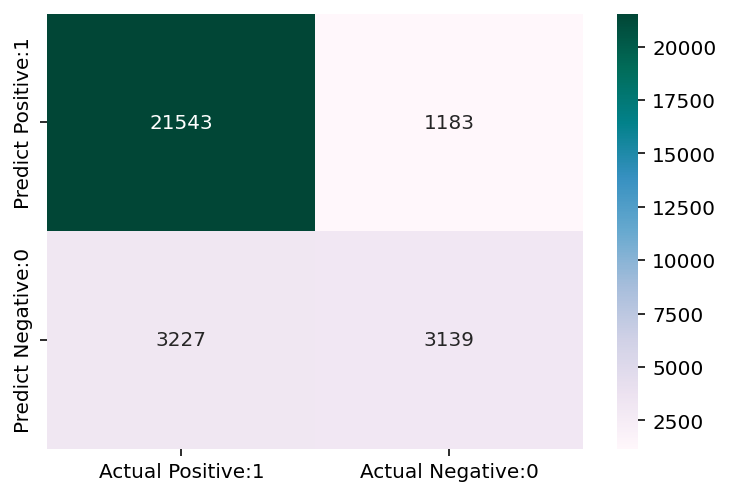

In [51]:
cm_matrix = pd.DataFrame(data=cm,
                         columns=['Actual Positive:1', 'Actual Negative:0'],
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='PuBuGn')

In [52]:
#Conocer los precision, recall, f1 y support scores
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22726
         Yes       0.73      0.49      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



In [53]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print ('classification accuracy:',round(classification_accuracy,4))
classification_error = (FP+FN)/float(len(y_test))
print ('classfication error:', round(classification_error,4))

classification accuracy: 0.8484
classfication error: 0.1516


In [54]:
precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9479


In [55]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8697


In [56]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8697


In [57]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2737


In [58]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7263


In [60]:
#Adjusting the threshold level
#y_pred_prob = logreg.predict_proba(X_test)[0:10]
#y_pred_prob